In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


df = pd.read_csv('Marketing_data.csv')

# Initial exploration
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())

Dataset shape: (8950, 18)

First 5 rows:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.08333

In [31]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [32]:
# Data cleaning
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

print(f"Number of duplicates: {df.duplicated().sum()}")

df.drop('CUST_ID', axis=1, inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

Number of duplicates: 0

Missing values after cleaning:
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


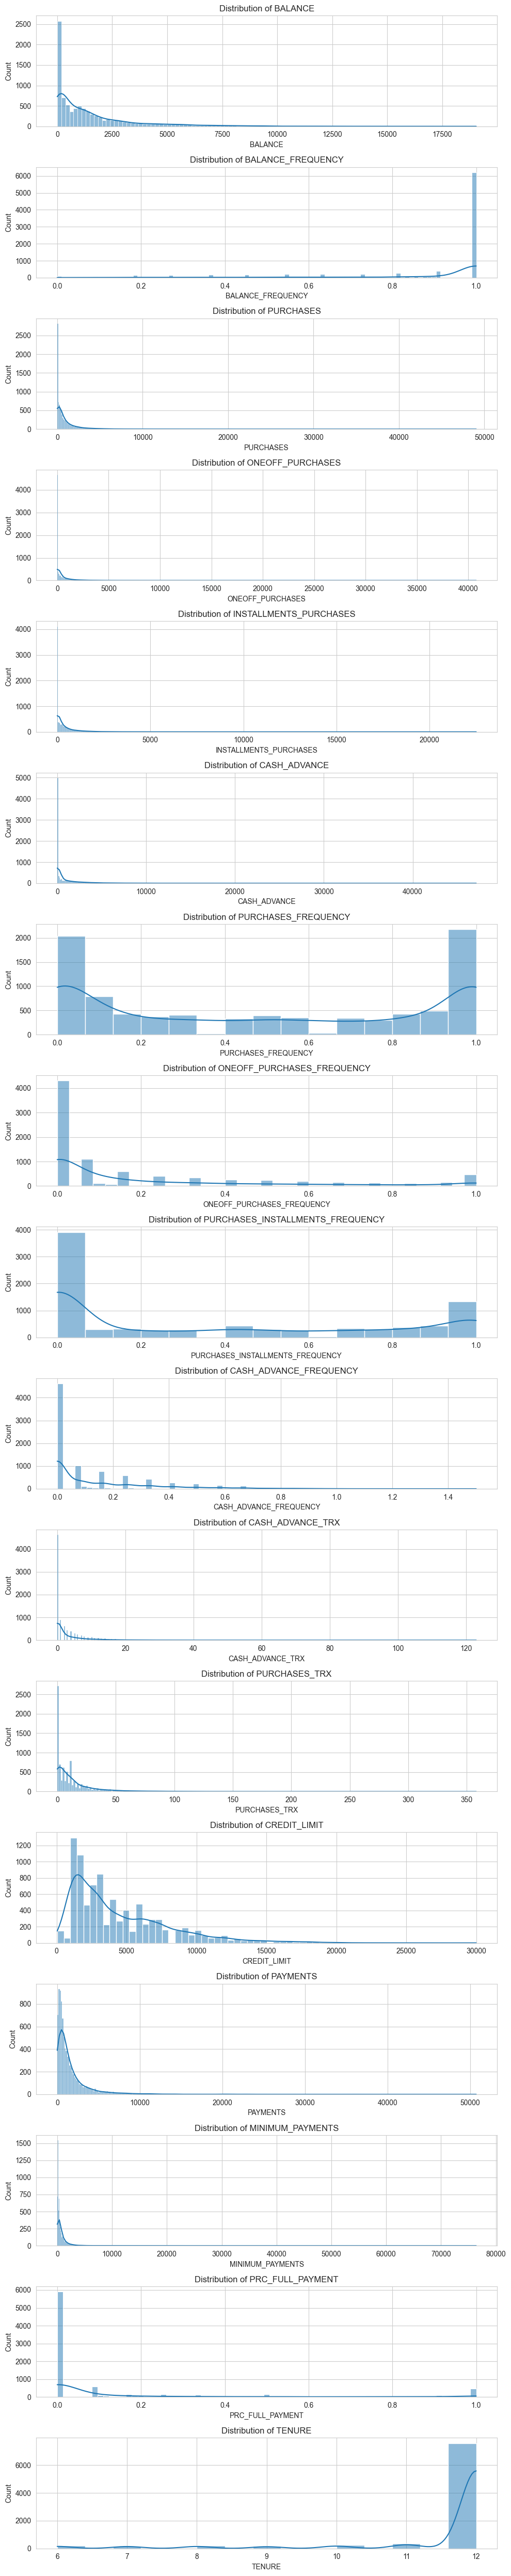

In [33]:
# Plot distributions of key features
plt.figure(figsize=(10, 50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    sns.histplot(df[df.columns[i]], kde=True)
    plt.title(f'Distribution of {df.columns[i]}')
    plt.tight_layout()
plt.savefig('../Marketing/visualizations/distribution _of_features.png')
plt.show()


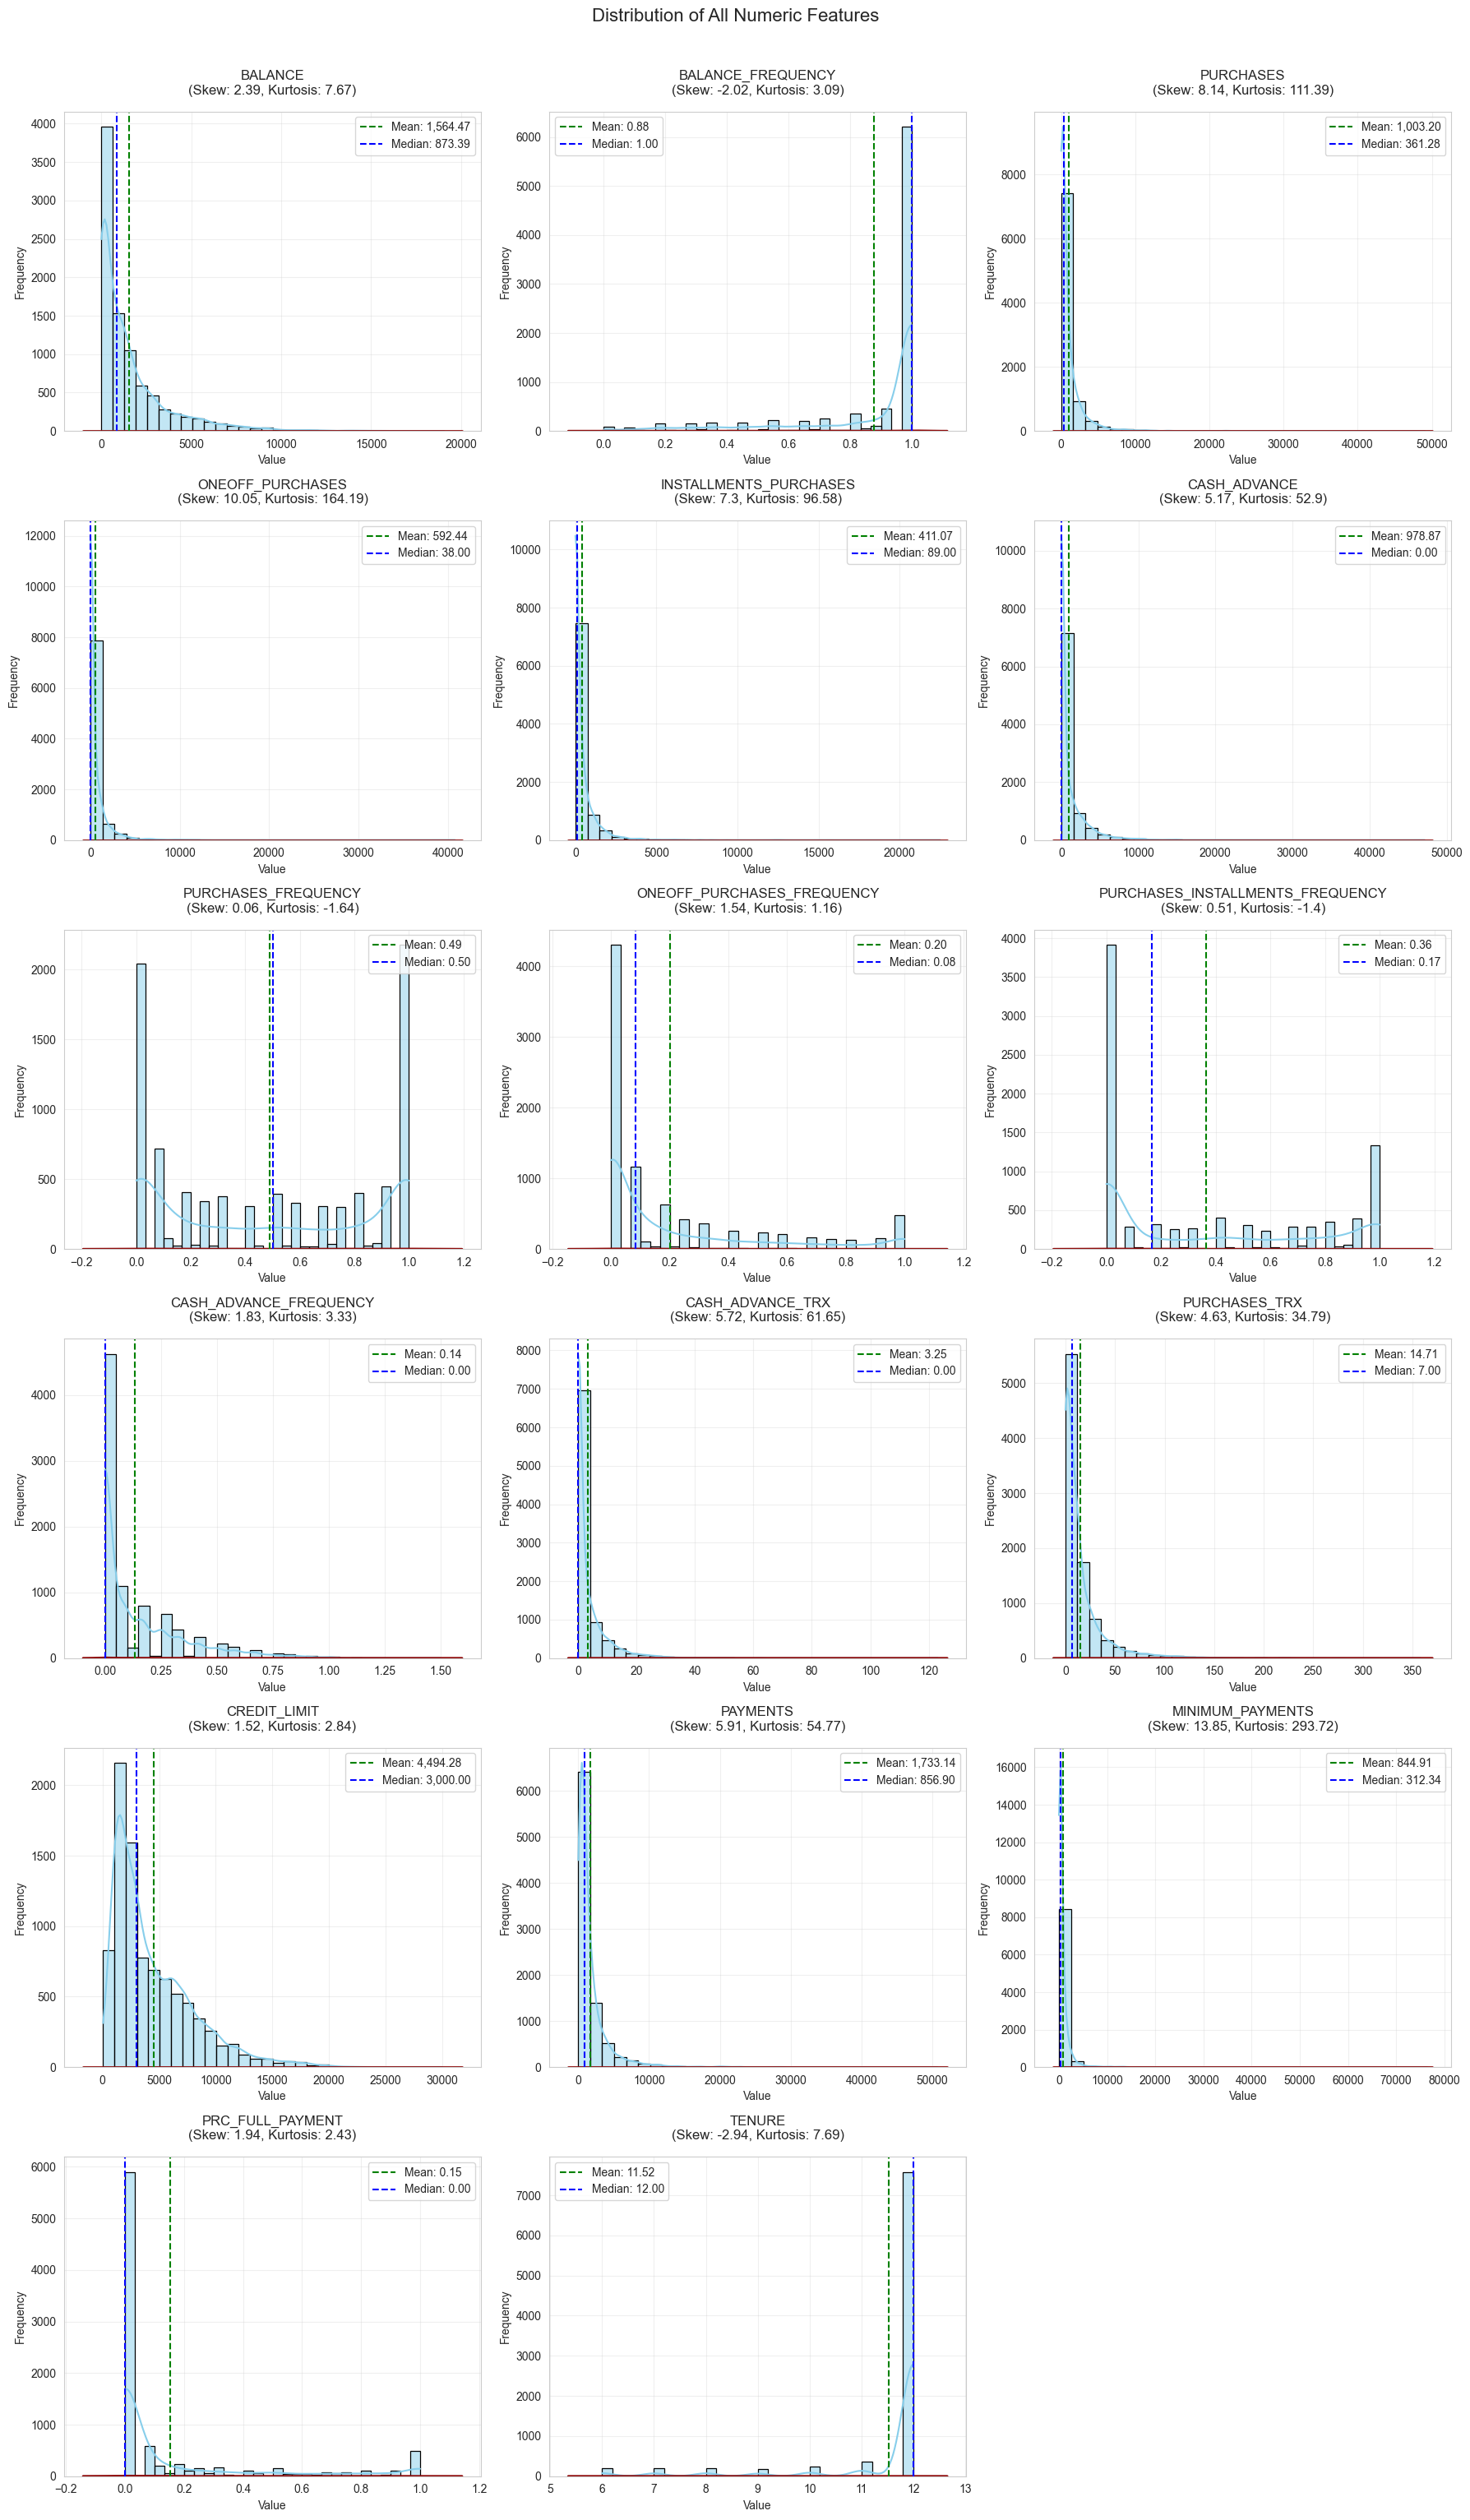


Missing Values Summary:
Series([], dtype: int64)


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Get all numeric columns (excluding cluster labels if present)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'CLUSTER' in numeric_cols:
    numeric_cols.remove('CLUSTER')

n_cols = 3
n_rows = int(np.ceil(len(numeric_cols)/n_cols))

plt.figure(figsize=(18, 5*n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Handle missing values for the plot
    plot_data = df[col].dropna()
    
    # Plot histogram and KDE
    ax = sns.histplot(plot_data, kde=True, bins=30, 
                     color='skyblue', edgecolor='black')
    
    # Add KDE line
    kde = sns.kdeplot(plot_data, color='darkred', linewidth=2, ax=ax)
    kde.set(ylabel=None)
    
    # Calculate statistics (using only non-null values)
    mean_val = plot_data.mean()
    median_val = plot_data.median()
    skewness = plot_data.skew().round(2)
    kurtosis = plot_data.kurtosis().round(2)
    
    # Add reference lines
    plt.axvline(mean_val, color='green', linestyle='--', 
                linewidth=1.5, label=f'Mean: {mean_val:,.2f}')
    plt.axvline(median_val, color='blue', linestyle='--', 
                linewidth=1.5, label=f'Median: {median_val:,.2f}')
    
    # Format title and labels
    plt.title(f'{col}\n(Skew: {skewness}, Kurtosis: {kurtosis})', pad=15)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribution of All Numeric Features', y=1.02, fontsize=16)
plt.savefig('../Marketing/visualizations/KDE-plots.png')
plt.show()


# Print missing value information
print("\nMissing Values Summary:")
missing_info = df[numeric_cols].isnull().sum()
print(missing_info[missing_info > 0])

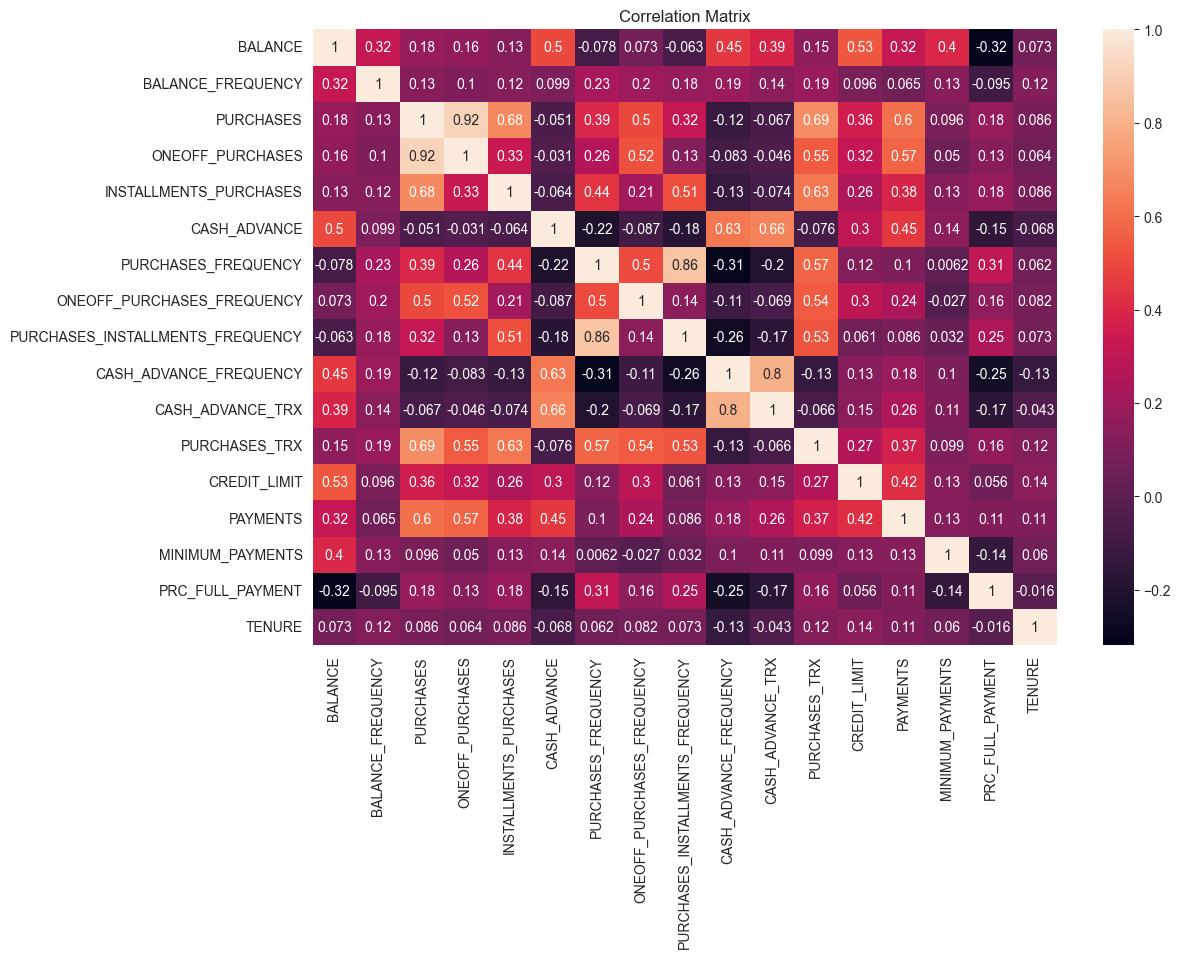

In [35]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.savefig('../Marketing/visualizations/correlation.png')
plt.show()


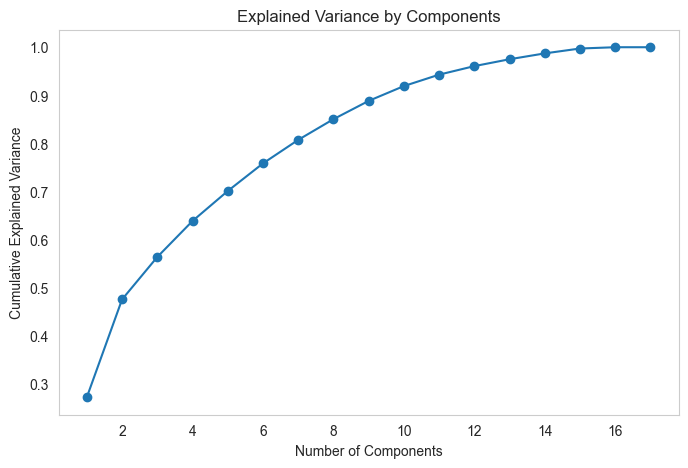

In [36]:
#Feature Engineering
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# PCA for dimensionality reduction
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid()
plt.savefig('../Marketing/visualizations/PCA.png')
plt.show()


# Select number of components (e.g., 6 for ~85% variance)
n_components = 6
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

In [37]:
scores_1=[]
range_values= range(1,20)
for i in range_values:
    kmeans =KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    scores_1.append(kmeans.inertia_)
scores_1

[152150.0,
 127784.39847671828,
 112647.99572669927,
 99061.93984229013,
 92113.46773566263,
 87412.54285166926,
 79518.58056513709,
 75544.56851055802,
 71354.77529021027,
 69589.06981240034,
 65957.58961486424,
 62287.51341185402,
 60527.98887501583,
 57851.47614357498,
 56184.748633649724,
 54890.92093959995,
 53842.49462227631,
 52018.22209009234,
 51872.11429748219]

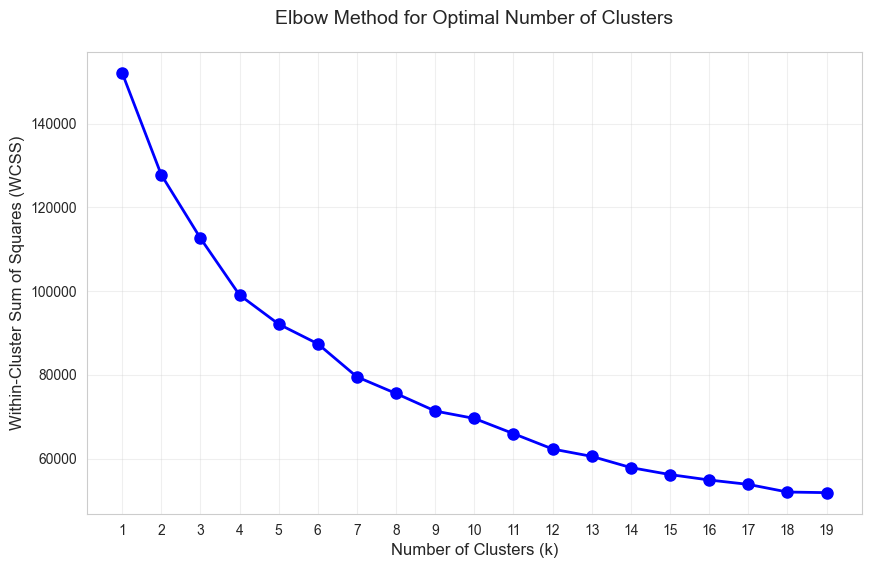

In [38]:


# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range_values, scores_1, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14, pad=20)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.xticks(range_values)
plt.grid(True, alpha=0.3)



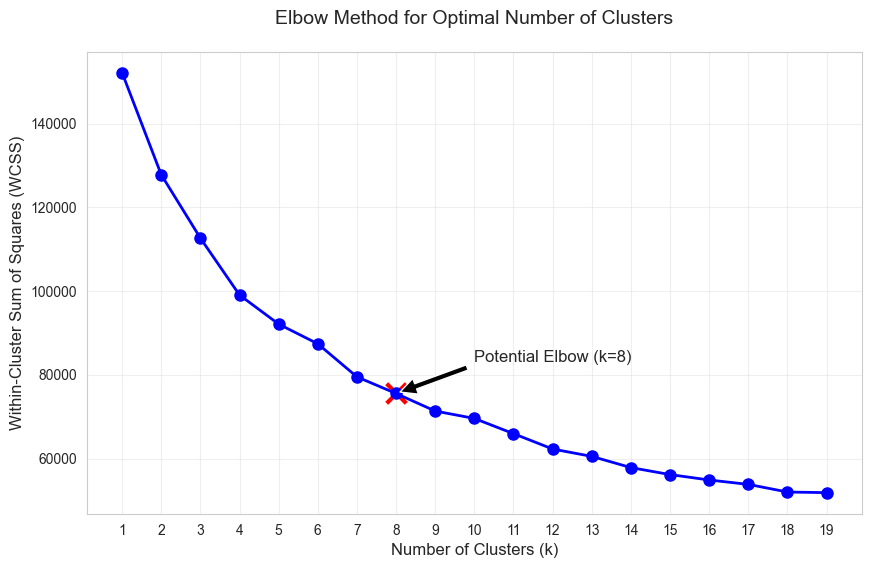


WCSS Values:
k    WCSS           
--------------------
1    152150.00
2    127784.40
3    112648.00
4    99061.94
5    92113.47
6    87412.54
7    79518.58
8    75544.57
9    71354.78
10   69589.07
11   65957.59
12   62287.51
13   60527.99
14   57851.48
15   56184.75
16   54890.92
17   53842.49
18   52018.22
19   51872.11


In [39]:
# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range_values, scores_1, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14, pad=20)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.xticks(range_values)
plt.grid(True, alpha=0.3)
elbow_point = 8
plt.scatter(elbow_point, scores_1[elbow_point-1], s=200, c='red', marker='x', linewidths=3)
plt.annotate(f'Potential Elbow (k={elbow_point})', 
             xy=(elbow_point, scores_1[elbow_point-1]),
             xytext=(elbow_point+2, scores_1[elbow_point-1]*1.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.savefig('../Marketing/visualizations/elbow_method.png')
plt.show()



# Print WCSS values in a table format
print("\nWCSS Values:")
print(f"{'k':<5}{'WCSS':<15}")
print("-"*20)
for k, wcss in zip(range_values, scores_1):
    print(f"{k:<5}{wcss:.2f}")

In [40]:
kmeans= KMeans(8)
kmeans.fit(scaled_data)
labels = kmeans.labels_

In [41]:
labels

array([3, 1, 0, ..., 2, 3, 6], dtype=int32)

In [42]:
kmeans.cluster_centers_

array([[-1.56043293e-01,  3.86031781e-01,  4.73501348e-01,
         6.12154565e-01, -5.20680861e-03, -3.28206391e-01,
         9.51645843e-01,  1.86601390e+00,  1.17791690e-01,
        -4.01332012e-01, -3.25674306e-01,  5.38001128e-01,
         3.86032612e-01,  9.92840967e-02, -1.59514106e-01,
         4.02502220e-01,  1.92730691e-01],
       [ 1.23628115e+00,  3.63259069e-01, -3.12175929e-01,
        -2.23055489e-01, -3.28383903e-01,  1.09335982e+00,
        -6.62600916e-01, -3.36152687e-01, -5.74601384e-01,
         1.50349668e+00,  1.09646698e+00, -3.94968664e-01,
         6.26990184e-01,  1.52690132e-01,  4.14736892e-01,
        -4.44596361e-01, -2.02856678e-01],
       [-4.05763296e-01,  3.07875145e-01, -5.65785629e-02,
        -2.54255684e-01,  3.33296554e-01, -3.66184471e-01,
         1.00360878e+00, -4.06932428e-01,  1.20204333e+00,
        -4.73607058e-01, -3.64832898e-01,  1.50874549e-01,
        -3.20612716e-01, -2.43411892e-01, -6.84783659e-02,
         3.82954539e-01, -2.9

In [43]:
cluster_centers= pd.DataFrame(data=kmeans.cluster_centers_, columns=[df.columns])

In [44]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.156043,0.386032,0.473501,0.612155,-0.005207,-0.328206,0.951646,1.866014,0.117792,-0.401332,-0.325674,0.538001,0.386033,0.099284,-0.159514,0.402502,0.192731
1,1.236281,0.363259,-0.312176,-0.223055,-0.328384,1.093360,-0.662601,-0.336153,-0.574601,1.503497,1.096467,-0.394969,0.626990,0.152690,0.414737,-0.444596,-0.202857
2,-0.405763,0.307875,-0.056579,-0.254256,0.333297,-0.366184,1.003609,-0.406932,1.202043,-0.473607,-0.364833,0.150875,-0.320613,-0.243412,-0.068478,0.382955,-0.029739
3,-0.121946,0.370034,-0.355233,-0.239927,-0.399034,-0.177551,-0.839932,-0.391332,-0.746966,-0.019651,-0.130155,-0.481994,-0.413334,-0.297350,-0.078007,-0.452265,0.044924
4,0.932782,0.467293,2.244775,1.695508,2.192816,-0.188991,1.163260,1.532763,1.261366,-0.302856,-0.207187,2.799184,1.219395,1.238349,0.624299,0.267451,0.333865
5,1.815947,0.347643,-0.008569,-0.004238,-0.012799,3.879357,-0.217569,0.019029,-0.170514,2.564194,3.659958,-0.018169,1.301268,2.504393,0.595050,-0.216751,0.069501
6,-0.698562,-2.152136,-0.318115,-0.237271,-0.316164,-0.310972,-0.564571,-0.437998,-0.456895,-0.485592,-0.364249,-0.427505,-0.215963,-0.226539,-0.285539,0.253543,-0.161046
7,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044081,8.098975,1.127533,1.110132,0.310863


In [45]:
df_cluster=pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)

In [46]:
df_cluster.to_csv('../Marketing/clustered_data.csv')

In [51]:
for i in df.columns:
    plt.figure(figsize=(35,2))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster=df_cluster[df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{} \n Cluster {}'.format(i,j))
        plt.savefig(f'../Marketing/visualizations/{i}_clusters.png', 
               bbox_inches='tight', dpi=100)
    plt.close()
plt.show()


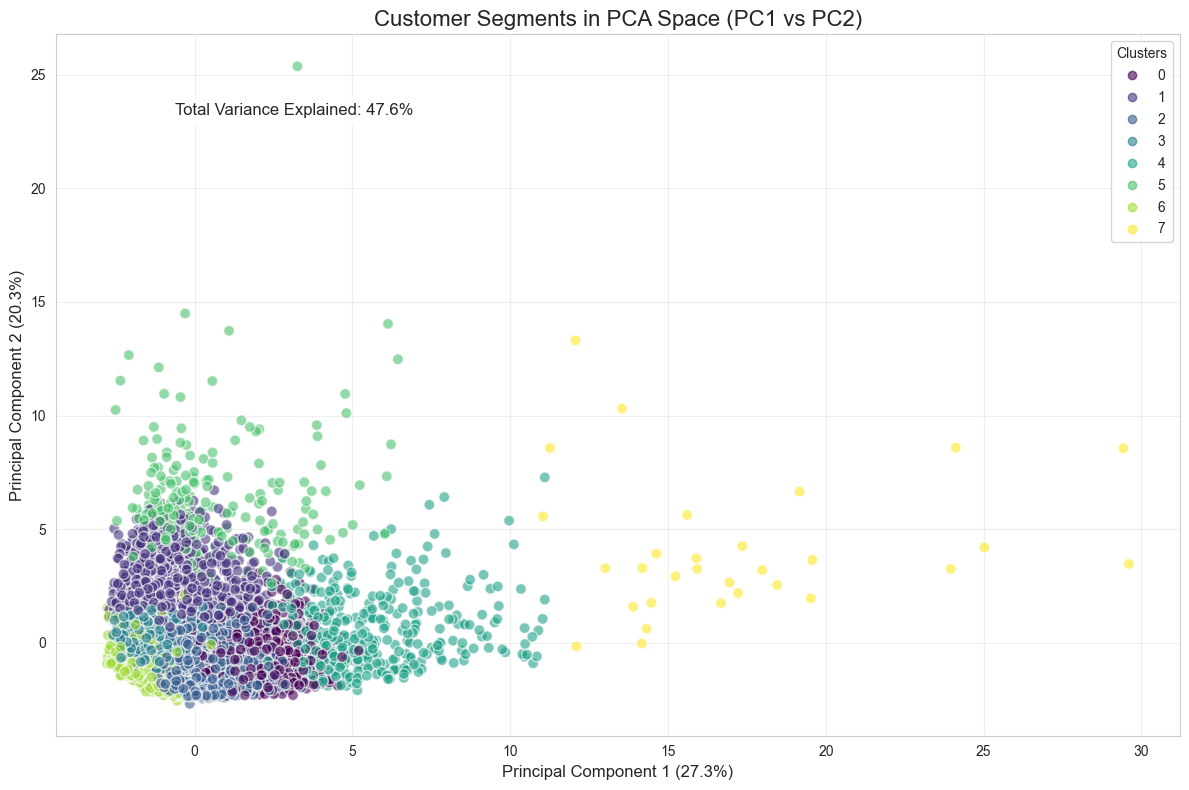

In [48]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Prepare the data (exclude cluster labels)
X = df_cluster.drop('cluster', axis=1)

# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, 
                     columns=['PC1', 'PC2'])
pca_df['cluster'] = df_cluster['cluster'].values

# 4. Plot the clusters in PCA space
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], 
                     c=pca_df['cluster'], 
                     cmap='viridis',
                     alpha=0.6,
                     edgecolor='w',
                     s=60)

# Add labels and title
plt.title('Customer Segments in PCA Space (PC1 vs PC2)', fontsize=16)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)

# Add legend
legend = plt.legend(*scatter.legend_elements(),
                   title="Clusters",
                   loc="upper right")
plt.grid(alpha=0.3)

# 5. Add explained variance information
plt.figtext(0.15, 0.85, 
           f"Total Variance Explained: {pca.explained_variance_ratio_.sum()*100:.1f}%",
           fontsize=12,
           bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('../Marketing/visualizations/customer_segments.png')
plt.show()


In [49]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras import backend as K
from keras.utils import to_categorical

# Prepare data
X_train = X_scaled
y_train = to_categorical(df_cluster['cluster'])  # One-hot encode clusters

# Build a simple classifier
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                   epochs=50,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training accuracy: {accuracy*100:.2f}%")

# This model can now be used to predict clusters for new customers

Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5969 - loss: 1.3033 - val_accuracy: 0.9564 - val_loss: 0.1945
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9329 - loss: 0.2298 - val_accuracy: 0.9648 - val_loss: 0.1206
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9600 - loss: 0.1424 - val_accuracy: 0.9704 - val_loss: 0.1012
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9607 - loss: 0.1225 - val_accuracy: 0.9687 - val_loss: 0.0874
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9627 - loss: 0.1062 - val_accuracy: 0.9737 - val_loss: 0.0809
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9686 - loss: 0.0928 - val_accuracy: 0.9732 - val_loss: 0.0717
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9763 - loss: 0.0808 - val_accuracy: 0.9698 - val_loss: 0.0723
Epoch 8/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9780 - loss: 0.0741 - val_accuracy: 

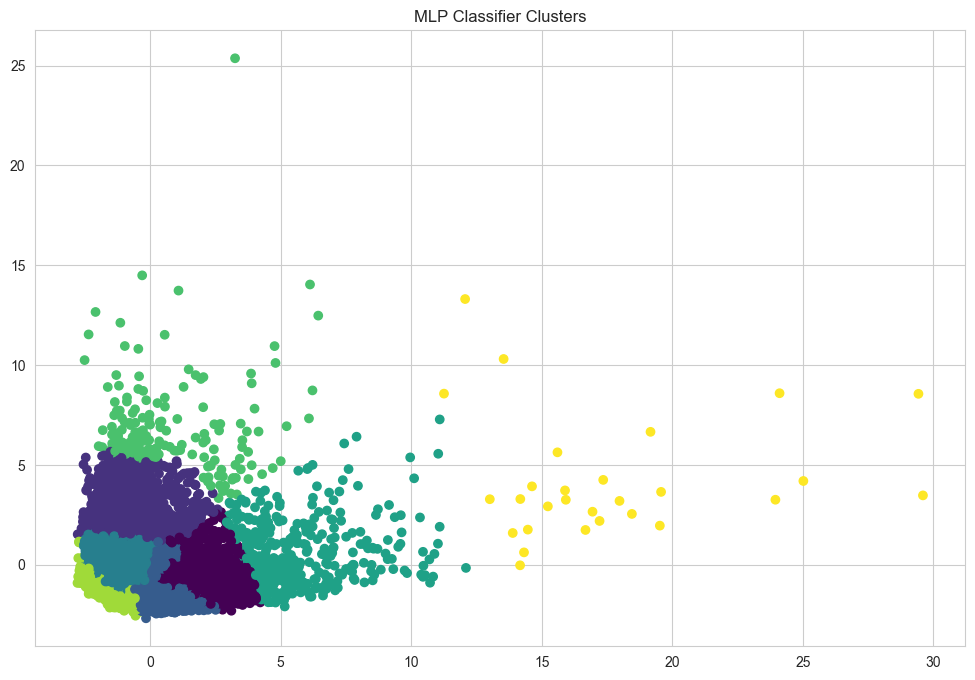

In [50]:
from sklearn.neural_network import MLPClassifier

# Using your PCA-prepared data
X = pca_df[['PC1', 'PC2']].values
y = pca_df['cluster'].values

# Create and train MLP
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),
                   activation='relu',
                   max_iter=1000,
                   random_state=42)
mlp.fit(X, y)

# Predict clusters
predicted_clusters = mlp.predict(X)

# Visualize
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, cmap='viridis')
plt.title('MLP Classifier Clusters')
plt.savefig('../Marketing/visualizations/customer_segments_MLP_classifier.png')
plt.show()

